<a href="https://colab.research.google.com/github/Pamela2710/Data-Mining/blob/main/DataProcessingClassification(DecisionTrees)/DataProcessing_and_Classification_(DecisionTrees).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score, f1_score, matthews_corrcoef, confusion_matrix, roc_curve, precision_recall_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from sklearn.base import clone
from scipy.stats import entropy
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import re
import warnings
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')


# Función para cargar y preprocesar los datos
def load_and_preprocess_data():
    dataset = pd.read_csv('https://raw.githubusercontent.com/Pamela2710/Data-Mining/main/DataProcessing/features_completas.csv', encoding='latin-1')
    dataset.dropna(inplace=True)
    dataset.drop(columns=['espectrograma etiqueta'], inplace=True)  # Eliminar columna no relevante

    label_encoder = LabelEncoder()
    dataset['Etiqueta'] = label_encoder.fit_transform(dataset['Etiqueta'])

    X = dataset.iloc[:, :-1]
    y = dataset['Etiqueta']

    return pd.DataFrame(X, columns=X.columns), y


x, y = load_and_preprocess_data()

scaler = MinMaxScaler()

# Normalización
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [2]:
a = [ [0, 4, 6, 13, 14, 18, 20, 22, 23, 26, 30, 34, 37, 41, 45, 48, 49, 50, 51, 54, 57, 58, 62, 66, 69, 74, 75, 76, 77, 78, 81, 82, 83, 85, 86, 89, 92, 93, 94, 95, 99, 102, 103, 106, 107],
      [3, 8, 12, 13, 15, 17, 19, 23, 24, 25, 26, 27, 29, 32, 35, 36, 38, 41, 42, 44, 47, 48, 50, 51, 54, 55, 57, 59, 64, 68, 69, 73, 77, 78, 79, 81, 82, 85, 86, 89, 90, 91, 98, 100, 102, 103, 104, 106],
      [2, 4, 5, 6, 12, 15, 16, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 35, 36, 40, 46, 49, 50, 51, 53, 57, 58, 61, 62, 64, 69, 71, 72, 75, 76, 78, 79, 81, 86, 89, 90, 91, 95, 97, 99, 100, 101, 102, 103, 104, 106]]

# Obtener características y etiquetas

X_list = []
for indices in a:
    reduced = x_scaled.iloc[:, indices]
    X_list.append(reduced)

In [3]:
def stratified_kfold_cv(X, y, n_splits=10):
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    for train_index, val_index in stratified_kfold.split(X, y):
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]  # Usar .iloc para acceder a las filas por índice
        X_val, y_val = X.iloc[val_index], y.iloc[val_index]

        yield X_train, y_train, X_val, y_val

#Information Gain

Set:  1
Accuracy: 0.90 ± 0.03
Precision: 0.89 ± 0.02
Recall: 0.90 ± 0.03
AUC: 0.83 ± 0.05
F1: 0.89 ± 0.02
MCC: 0.63 ± 0.08


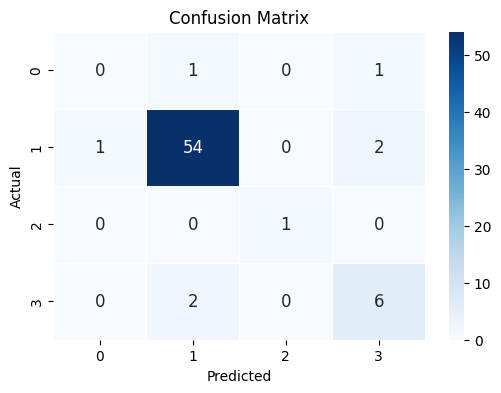

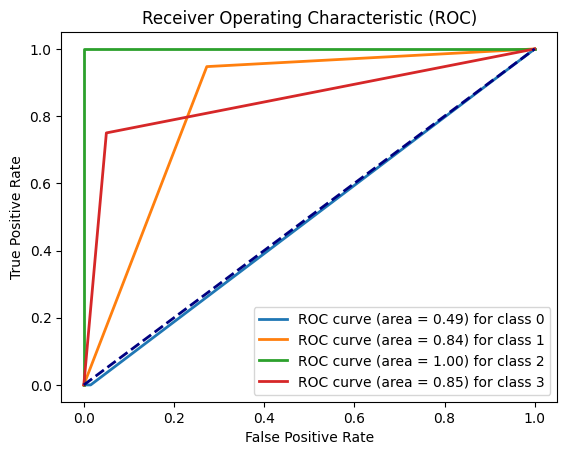

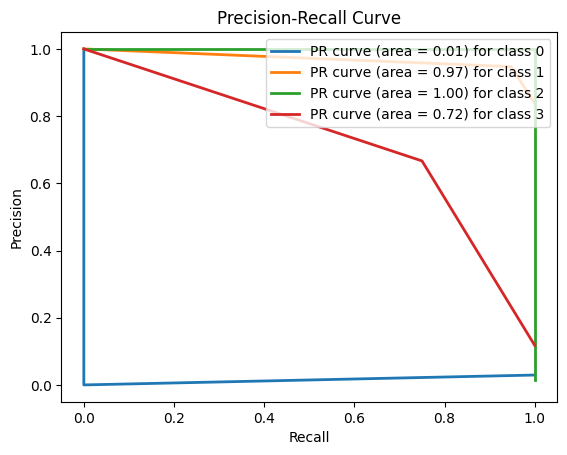

Set:  2
Accuracy: 0.91 ± 0.04
Precision: 0.91 ± 0.03
Recall: 0.91 ± 0.04
AUC: 0.87 ± 0.06
F1: 0.91 ± 0.03
MCC: 0.67 ± 0.10


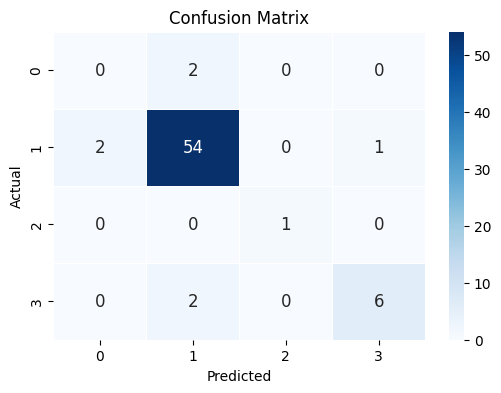

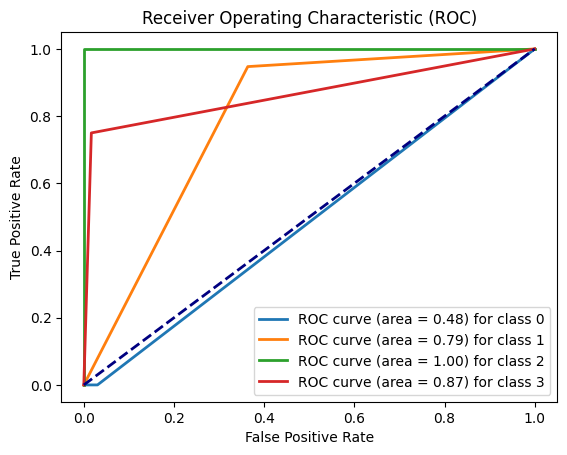

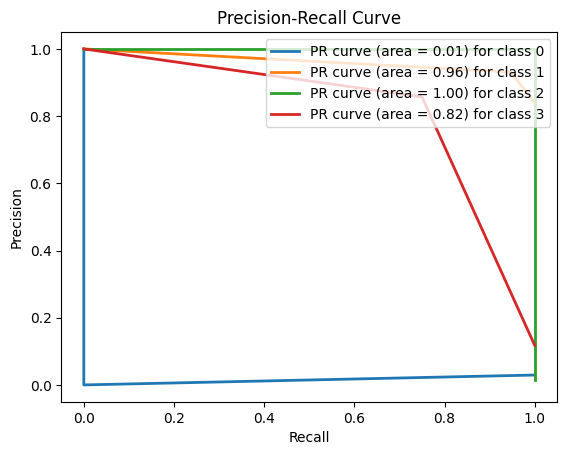

Set:  3
Accuracy: 0.90 ± 0.03
Precision: 0.89 ± 0.02
Recall: 0.90 ± 0.03
AUC: 0.82 ± 0.04
F1: 0.88 ± 0.02
MCC: 0.60 ± 0.07


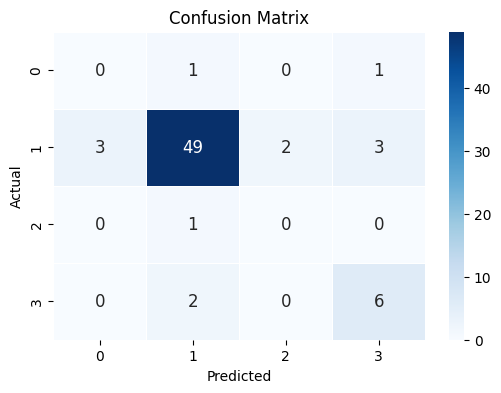

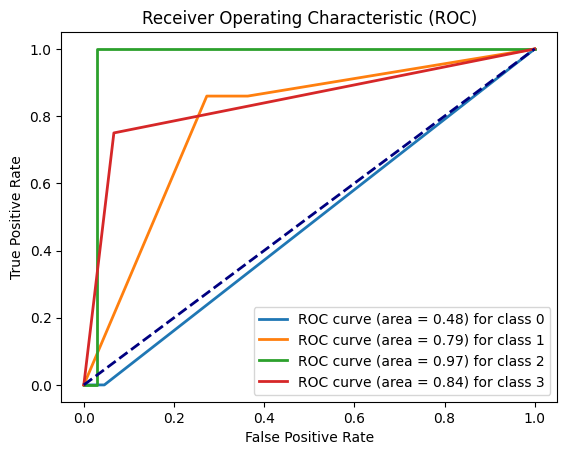

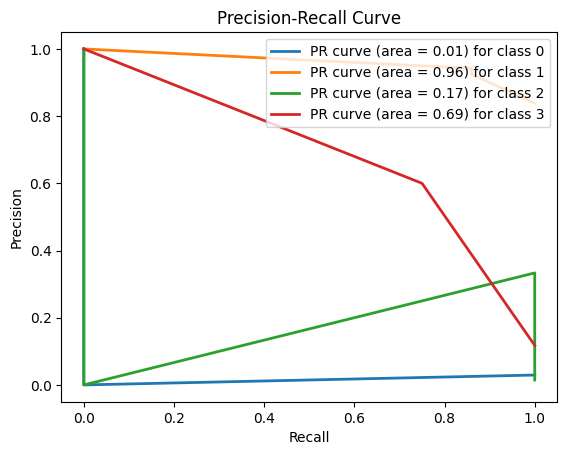

In [4]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score, f1_score, matthews_corrcoef

#Creacion dinamica de folds y clasificacion y metricas
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
counter=1
#Information Gain Tree
for X in X_list:
    print("Set: ",counter)
    array_accuracy_ig = []
    array_precision_ig = []
    array_recall_ig = []
    array_auc_ig = []
    array_f1_ig = []
    matthews_corrcoef_ig = []
    sensitivity_ig = []
    specificity_ig = []

    for X_train, y_train, X_val, y_val in stratified_kfold_cv(X, y):

      unique_classes_train = np.unique(y_train)
      unique_classes_val = np.unique(y_val)

      missing_class =set(unique_classes_train).symmetric_difference(set(unique_classes_val))
      #print(missing_class)
      if missing_class:
          missing_class = list(missing_class)[0]  # Extract the missing class
          #print(f"clase perdida: {missing_class}")
          # Find indices of samples with the missing class in y_val
          missing_class_indices = np.where(y_train == missing_class)[0]
          # Randomly select one sample with the missing class
          random_index = np.random.choice(missing_class_indices)
          #print(f"objeto añadido: {random_index}")
          # Add the sample with the missing class to the training set
          X_val = pd.concat([X_val, X_train.iloc[[random_index]]], ignore_index=True)
          y_val = pd.concat([y_val, y_train.iloc[[random_index]]], ignore_index=True)
        #IG decision tree
      clf = DecisionTreeClassifier(criterion='entropy')
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_val)
      y_proba = clf.predict_proba(X_val)

      #Accuracy
      ig_acc=accuracy_score(y_val, y_pred)
      array_accuracy_ig.append(ig_acc)

      #Precision
      ig_precision=precision_score(y_val, y_pred, average='weighted')
      array_precision_ig.append(ig_precision)

      #Recall
      ig_recall=recall_score(y_val, y_pred, average='weighted')
      array_recall_ig.append(ig_recall)

      #AUC
      ig_auc=roc_auc_score(y_val, y_proba, average='weighted', multi_class='ovr')
      array_auc_ig.append(ig_auc)

      #F1
      ig_f1=f1_score(y_val, y_pred, average='weighted')
      array_f1_ig.append(ig_f1)

      #Confusion matrix
      conf_matrix = confusion_matrix(y_val, y_pred)
      TP = conf_matrix[1, 1]
      TN = conf_matrix[0, 0]
      FP = conf_matrix[0, 1]
      FN = conf_matrix[1, 0]

      #Calculate Mathew correlation coefficient
      matthews_corrcoef_ig.append(matthews_corrcoef(y_val, y_pred))

        # Calculate sensitivity and specificity
      sensitivity = TP / (TP + FN)
      sensitivity_ig.append(sensitivity)
      specificity = TN / (TN + FP)
      specificity_ig.append(specificity)

    mean_accuracy_ig = np.max(array_accuracy_ig)
    mean_precision_ig = np.max(array_precision_ig)
    mean_recall_ig = np.max(array_recall_ig)
    mean_auc_ig = np.max(array_auc_ig)
    mean_f1_ig = np.max(array_f1_ig)
    mean_matthews_corrcoef_ig = np.max(matthews_corrcoef_ig)
    mean_sensitivity_ig = np.mean(sensitivity_ig)
    mean_specificity_ig = np.mean(specificity_ig)

    std_accuracy_ig = np.std(array_accuracy_ig)
    std_precision_ig = np.std(array_precision_ig)
    std_recall_ig = np.std(array_recall_ig)
    std_auc_ig = np.std(array_auc_ig)
    std_f1_ig = np.std(array_f1_ig)
    std_matthews_corrcoef_ig = np.std(matthews_corrcoef_ig)

    print(f"Accuracy: {mean_accuracy_ig:.2f} ± {std_accuracy_ig:.2f}")
    print(f"Precision: {mean_precision_ig:.2f} ± {std_precision_ig:.2f}")
    print(f"Recall: {mean_recall_ig:.2f} ± {std_recall_ig:.2f}")
    print(f"AUC: {mean_auc_ig:.2f} ± {std_auc_ig:.2f}")
    print(f"F1: {mean_f1_ig:.2f} ± {std_f1_ig:.2f}")
    print(f"MCC: {mean_matthews_corrcoef_ig:.2f} ± {std_matthews_corrcoef_ig:.2f}")

    # Confution matrix plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5, annot_kws={"size": 12})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # AUC plot
    # Calcular las probabilidades de predicción para cada clase
    y_score = clf.predict_proba(X_val)

    # Inicializar las listas para almacenar los resultados de la curva ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calcular la curva ROC para cada clase
    for i in range(len(np.unique(y))):
        fpr[i], tpr[i], _ = roc_curve(y_val == i, y_score[:, i])  # Convertir las etiquetas a booleanas
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotear las curvas ROC para cada clase
    plt.figure()
    for i in range(len(np.unique(y_val))):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Convertir las etiquetas a un formato binario
    y_val_bin = label_binarize(y_val, classes=np.unique(y_val))

    # Calcular las probabilidades de predicción para cada clase
    y_score = clf.predict_proba(X_val)

    # Inicializar las listas para almacenar los resultados de la curva Precision-Recall
    precision = dict()
    recall = dict()
    pr_auc = dict()

    # Calcular la curva Precision-Recall para cada clase
    for i in range(len(np.unique(y_val))):
        precision[i], recall[i], _ = precision_recall_curve(y_val_bin[:, i], y_score[:, i])
        pr_auc[i] = auc(recall[i], precision[i])

    # Plotear las curvas Precision-Recall para cada clase
    plt.figure()
    for i in range(len(np.unique(y_val))):
        plt.plot(recall[i], precision[i], lw=2, label='PR curve (area = {:.2f}) for class {}'.format(pr_auc[i], i))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="upper right")
    plt.show()
    counter+=1

#Gain Ratio

Set:  1
Accuracy: 0.93 ± 0.04
Precision: 0.91 ± 0.03
Recall: 0.93 ± 0.04
AUC: 0.85 ± 0.06
F1: 0.91 ± 0.03
MCC: 0.72 ± 0.11


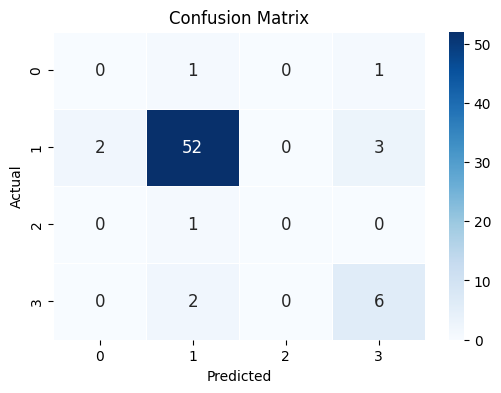

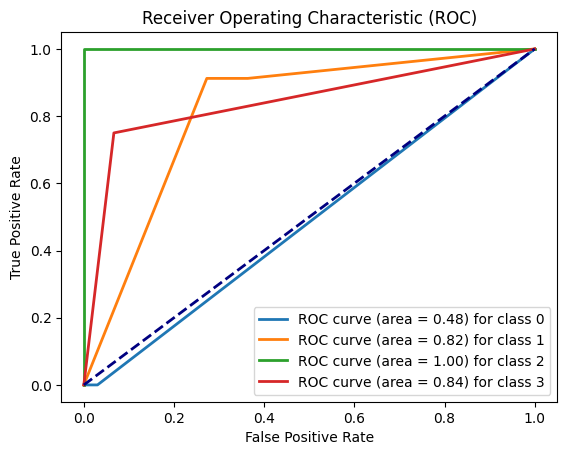

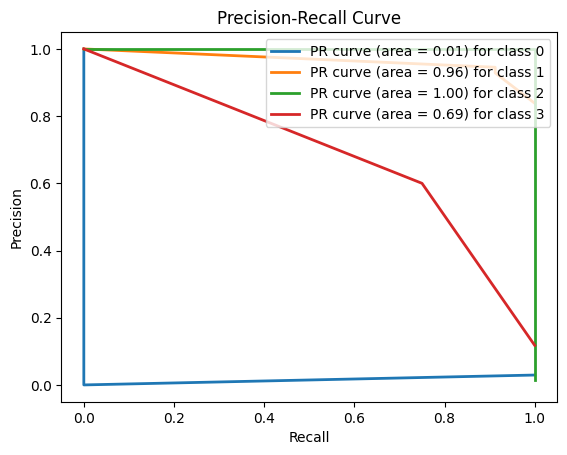

Set:  2
Accuracy: 0.91 ± 0.04
Precision: 0.90 ± 0.03
Recall: 0.91 ± 0.04
AUC: 0.83 ± 0.06
F1: 0.91 ± 0.03
MCC: 0.66 ± 0.12


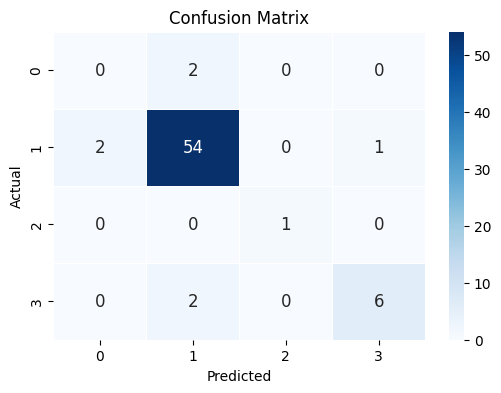

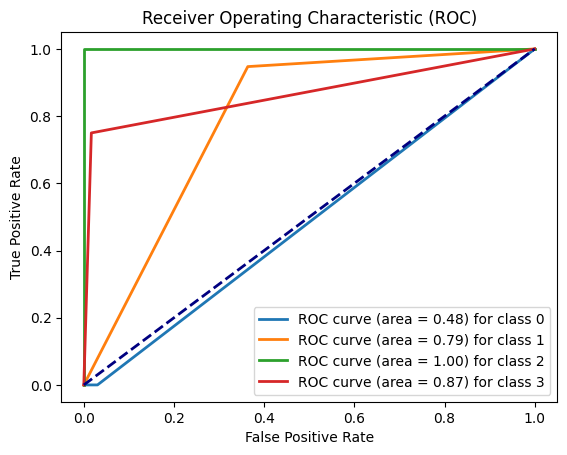

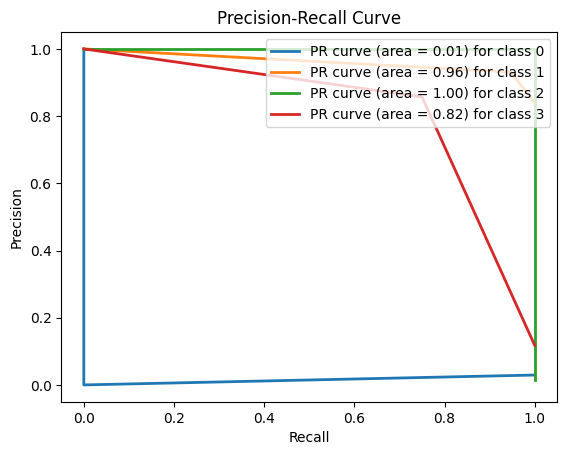

Set:  3
Accuracy: 0.88 ± 0.03
Precision: 0.90 ± 0.02
Recall: 0.88 ± 0.03
AUC: 0.79 ± 0.03
F1: 0.88 ± 0.02
MCC: 0.55 ± 0.08


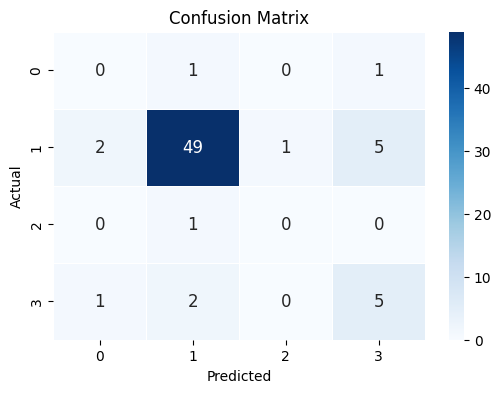

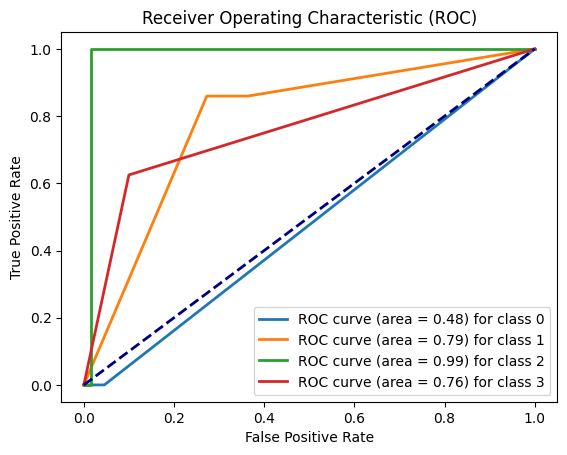

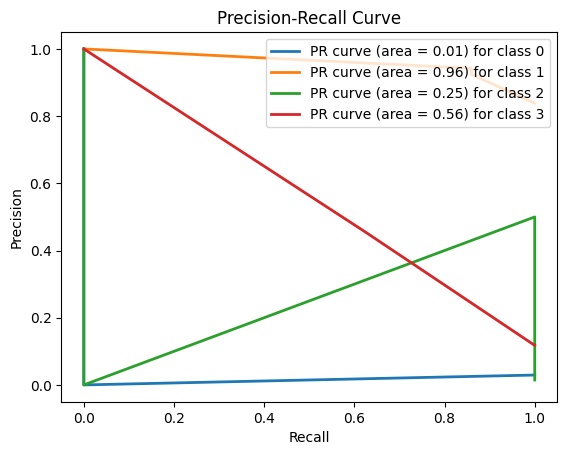

In [14]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score, f1_score, matthews_corrcoef

class GainRatioDecisionTree:
    def __init__(self, max_depth=None):
        self.tree = None
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)

    def build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        num_classes = len(np.unique(y))

        # Stopping conditions
        if depth == self.max_depth or num_classes == 1:
            # Create a leaf node with the majority class
            return {"leaf": True, "class": np.argmax(np.bincount(y))}

        # Calculate the initial entropy
        initial_entropy = self.calculate_entropy(y)

        # Initialize variables to track the best split
        best_gain_ratio = 0
        best_split = None
        best_subsets = None

        for feature in range(n_features):
            # Iterate through features to find the best split
            values = np.unique(X[:, feature])
            subsets = []

            for value in values:
                # Split the dataset into subsets
                left_mask = X[:, feature] <= value
                right_mask = X[:, feature] > value
                left_subset, right_subset = y[left_mask], y[right_mask]
                subsets.append((left_subset, right_subset))

            # Calculate the Gain Ratio for this feature
            gain_ratio = self.calculate_gain_ratio(y, subsets, initial_entropy)

            if gain_ratio > best_gain_ratio:
                # Update the best split
                best_gain_ratio = gain_ratio
                best_split = feature
                best_subsets = subsets

        if best_gain_ratio == 0:
            # No useful split found, create a leaf node
            return {"leaf": True, "class": np.argmax(np.bincount(y))}

        # Recursive tree-building logic
        left_tree = self.build_tree(X[best_subsets[0][0]], best_subsets[0][1], depth + 1)
        right_tree = self.build_tree(X[best_subsets[1][0]], best_subsets[1][1], depth + 1)

        return {
            "leaf": False,
            "feature": best_split,
            "left": left_tree,
            "right": right_tree
        }

    def calculate_entropy(self, y):
        # Helper function to calculate entropy
        unique_classes, class_counts = np.unique(y, return_counts=True)
        probabilities = class_counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def calculate_gain_ratio(self, y, subsets, initial_entropy):
        # Helper function to calculate Gain Ratio
        total_entropy = initial_entropy
        split_entropy = 0
        intrinsic_info = 0

        for subset in subsets:
            subset_entropy = self.calculate_entropy(subset)
            weight = len(subset) / len(y)
            split_entropy += weight * subset_entropy
            intrinsic_info += -weight * np.log2(weight)

        gain = total_entropy - split_entropy
        gain_ratio = gain / intrinsic_info if intrinsic_info > 0 else 0
        return gain_ratio

    def predict(self, X):
        # Check if the tree is already fitted
        if self.tree is None:
            raise ValueError("Decision tree has not been fitted. Please call 'fit' first.")

        # Create an empty array to store predictions
        predictions = np.zeros(X.shape[0], dtype=int)

        # Recursive prediction function
        def predict_tree(node, X, indices):
            if node["leaf"]:
                # If it's a leaf node, return the class label
                predictions[indices] = node["class"]
            else:
                feature = node["feature"]
                left_indices = indices[X[indices, feature] <= 0.5]  # Adjust the threshold as needed
                right_indices = indices[X[indices, feature] > 0.5]   # Adjust the threshold as needed
                if len(left_indices) > 0:
                    predict_tree(node["left"], X, left_indices)
                if len(right_indices) > 0:
                    predict_tree(node["right"], X, right_indices)

        predict_tree(self.tree, X, np.arange(X.shape[0]))
        return predictions


#Creacion dinamica de folds y clasificacion y metricas--------------------------------
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
counter=1

#Gain Ratio Tree
for X in X_list:
    print("Set: ",counter)
    array_accuracy_gini = []
    array_precision_gini = []
    array_recall_gini = []
    array_auc_gini = []
    array_f1_gini = []
    array_mcc_gini = []


    for X_train, y_train, X_val, y_val in stratified_kfold_cv(X, y):

      unique_classes_train = np.unique(y_train)
      unique_classes_val = np.unique(y_val)

      missing_class =set(unique_classes_train).symmetric_difference(set(unique_classes_val))
      #print(missing_class)
      if missing_class:
          missing_class = list(missing_class)[0]  # Extract the missing class
          #print(f"clase perdida: {missing_class}")
          # Find indices of samples with the missing class in y_val
          missing_class_indices = np.where(y_train == missing_class)[0]
          # Randomly select one sample with the missing class
          random_index = np.random.choice(missing_class_indices)
          #print(f"objeto añadido: {random_index}")
          # Add the sample with the missing class to the training set
          X_val = pd.concat([X_val, X_train.iloc[[random_index]]], ignore_index=True)
          y_val = pd.concat([y_val, y_train.iloc[[random_index]]], ignore_index=True)

      #GR decision tree
      cclf = GainRatioDecisionTree()
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_val)
      y_proba = clf.predict_proba(X_val)

      #Accuracy
      gini_acc=accuracy_score(y_val, y_pred)
      array_accuracy_gini.append(gini_acc)

      #Precision
      gini_precision=precision_score(y_val, y_pred, average='weighted')
      array_precision_gini.append(gini_precision)

      #Recall
      gini_recall=recall_score(y_val, y_pred, average='weighted')
      array_recall_gini.append(gini_recall)

      #AUC
      gini_auc=roc_auc_score(y_val, y_proba, average='weighted', multi_class='ovr')
      array_auc_gini.append(gini_auc)

      #F1
      gini_f1=f1_score(y_val, y_pred, average='weighted')
      array_f1_gini.append(gini_f1)

      #Confusion matrix
      conf_matrix = confusion_matrix(y_val, y_pred)
      TP = conf_matrix[1, 1]
      TN = conf_matrix[0, 0]
      FP = conf_matrix[0, 1]
      FN = conf_matrix[1, 0]

      #Calculate Mathew correlation coefficient
      array_mcc_gini.append(matthews_corrcoef(y_val, y_pred))





    mean_accuracy_gini = np.max(array_accuracy_gini)
    mean_precision_gini = np.max(array_precision_gini)
    mean_recall_gini = np.max(array_recall_gini)
    mean_auc_gini = np.max(array_auc_gini)
    mean_f1_gini = np.max(array_f1_gini)
    mean_mcc_gini = np.max(array_mcc_gini)


    std_accuracy_gini = np.std(array_accuracy_gini)
    std_precision_gini = np.std(array_precision_gini)
    std_recall_gini = np.std(array_recall_gini)
    std_auc_gini = np.std(array_auc_gini)
    std_f1_gini = np.std(array_f1_gini)
    std_mcc_gini = np.std(array_mcc_gini)


    print(f"Accuracy: {mean_accuracy_gini:.2f} ± {std_accuracy_gini:.2f}")
    print(f"Precision: {mean_precision_gini:.2f} ± {std_precision_gini:.2f}")
    print(f"Recall: {mean_recall_gini:.2f} ± {std_recall_gini:.2f}")
    print(f"AUC: {mean_auc_gini:.2f} ± {std_auc_gini:.2f}")
    print(f"F1: {mean_f1_gini:.2f} ± {std_f1_gini:.2f}")
    print(f"MCC: {mean_mcc_gini:.2f} ± {std_mcc_gini:.2f}")


    # Confution matrix plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5, annot_kws={"size": 12})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # AUC plot
    # Calcular las probabilidades de predicción para cada clase
    y_score = clf.predict_proba(X_val)

    # Inicializar las listas para almacenar los resultados de la curva ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calcular la curva ROC para cada clase
    for i in range(len(np.unique(y))):
        fpr[i], tpr[i], _ = roc_curve(y_val == i, y_score[:, i])  # Convertir las etiquetas a booleanas
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotear las curvas ROC para cada clase
    plt.figure()
    for i in range(len(np.unique(y_val))):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Convertir las etiquetas a un formato binario
    y_val_bin = label_binarize(y_val, classes=np.unique(y_val))

    # Calcular las probabilidades de predicción para cada clase
    y_score = clf.predict_proba(X_val)

    # Inicializar las listas para almacenar los resultados de la curva Precision-Recall
    precision = dict()
    recall = dict()
    pr_auc = dict()

    # Calcular la curva Precision-Recall para cada clase
    for i in range(len(np.unique(y_val))):
        precision[i], recall[i], _ = precision_recall_curve(y_val_bin[:, i], y_score[:, i])
        pr_auc[i] = auc(recall[i], precision[i])

    # Plotear las curvas Precision-Recall para cada clase
    plt.figure()
    for i in range(len(np.unique(y_val))):
        plt.plot(recall[i], precision[i], lw=2, label='PR curve (area = {:.2f}) for class {}'.format(pr_auc[i], i))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="upper right")
    plt.show()
    counter+=1